# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('/content/dataset2.csv')
df

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,7.824944,-0.887890,0.949137,0.867185,0.905457,-0.564753,1.064772,0.871957,0.073367,-0.468684,-1.518201
1,1,-0.284809,0.402109,-0.109812,0.353789,-0.368996,0.484929,-0.872589,-0.305881,-0.284581,0.547374,-0.755235
2,2,-5.551631,-0.114545,-1.603722,0.284455,-0.276847,-1.421414,-1.135600,-0.021529,-0.826239,0.647715,-2.370580
3,3,0.087262,0.832631,0.443724,0.472880,1.260798,0.589971,-0.150165,1.148314,1.034029,-0.205375,-0.488831
4,4,0.169201,0.318175,-0.042458,0.014656,0.323378,0.425665,0.268726,0.177851,-0.128694,0.110501,0.797469
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.284998,0.401581,0.133351,-0.285002,1.348053,-0.386241,-0.390832,-0.631856,-0.240864,-0.064970,-0.617728
996,996,-0.064230,0.859591,0.184304,-0.029521,2.466935,1.239812,-0.038577,0.945754,0.578205,-0.649108,0.420242
997,997,0.852619,0.990358,-0.118427,-0.723684,-0.027019,0.477223,-0.978561,-1.133379,-0.613947,0.279208,1.909412
998,998,16.528922,-0.498523,-2.075085,-1.654938,0.863903,0.903119,-0.733382,0.391713,-0.650520,-1.097475,0.965687


# Data Preprocessing

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   float64
 6   x6      1000 non-null   float64
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [5]:
df.isnull().sum()

,0
y,0
x1,0
x2,0
x3,0
x4,0
x5,0
x6,0
x7,0
x8,0
x9,0


In [6]:
df[df.duplicated()]

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10


<Axes: >

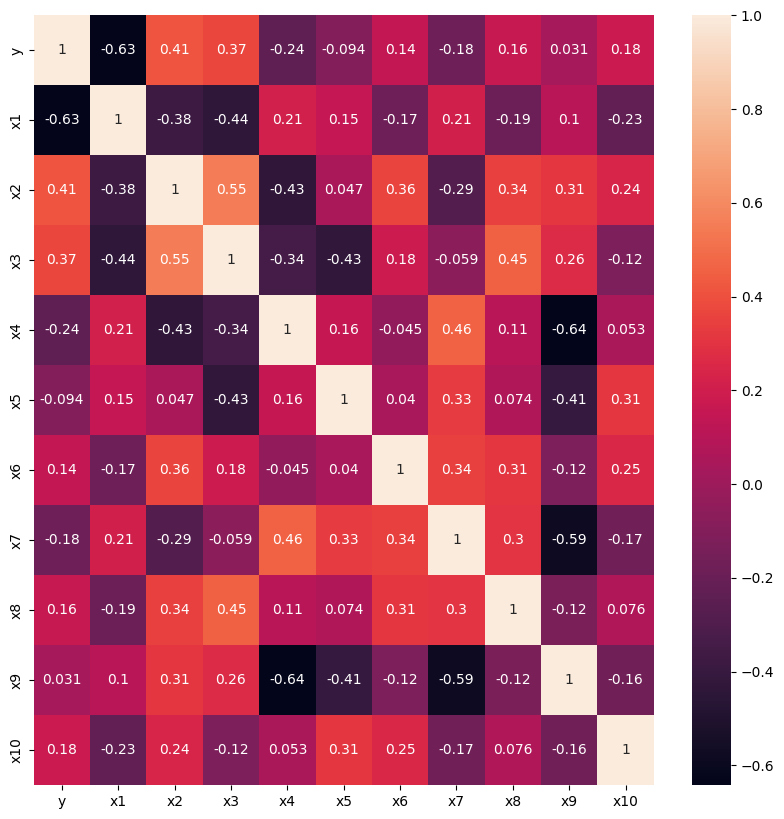

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

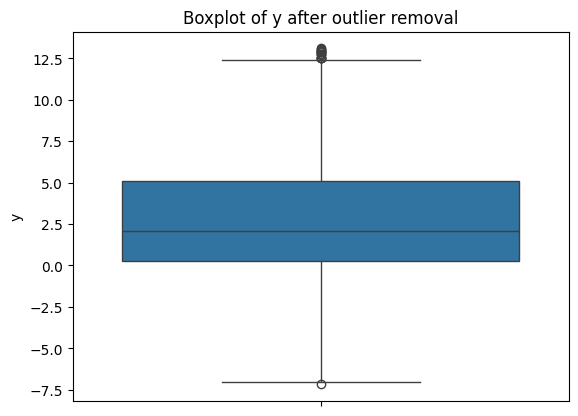

In [36]:
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['y'] > lower_bound) & (df['y'] < upper_bound)]
sns.boxplot(df['y'])
plt.title('Boxplot of y after outlier removal')
plt.ylabel('y')
plt.show()

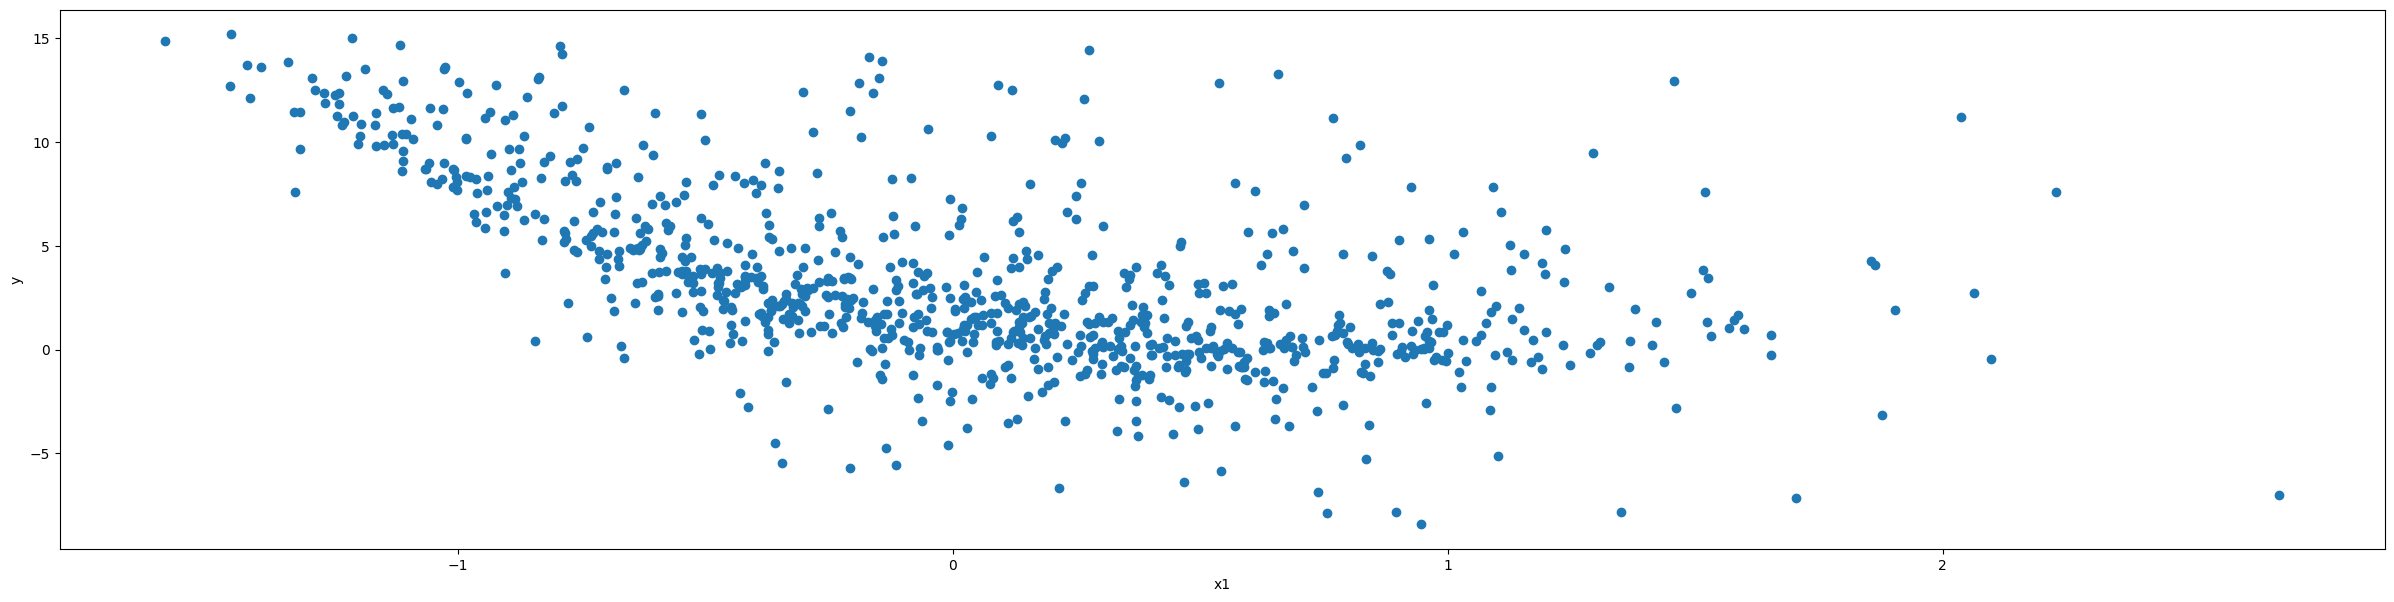

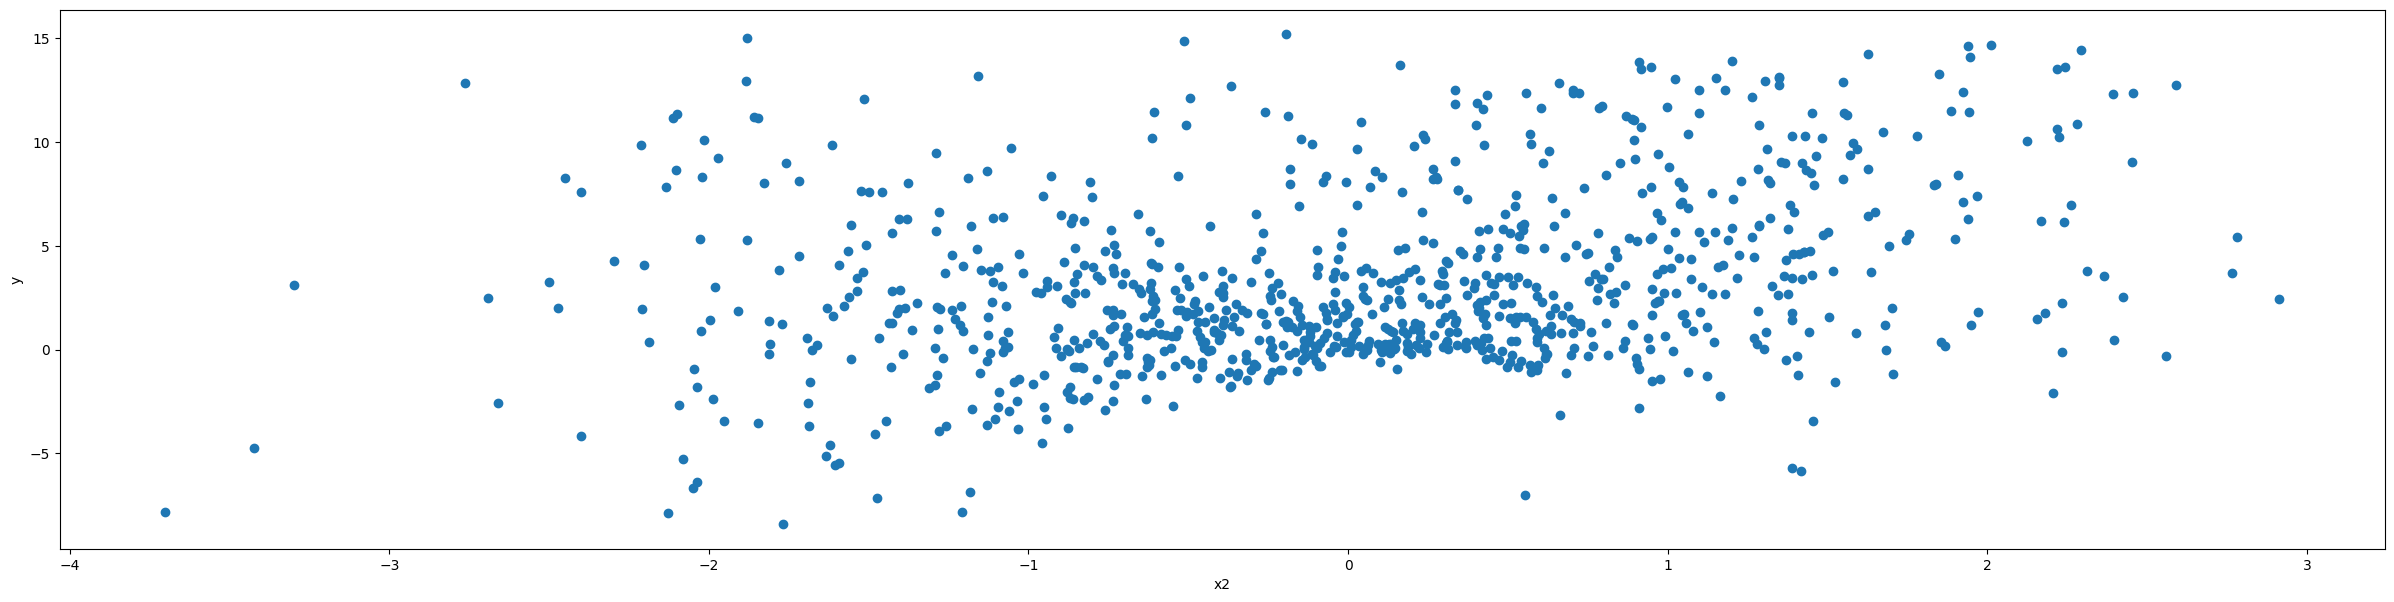

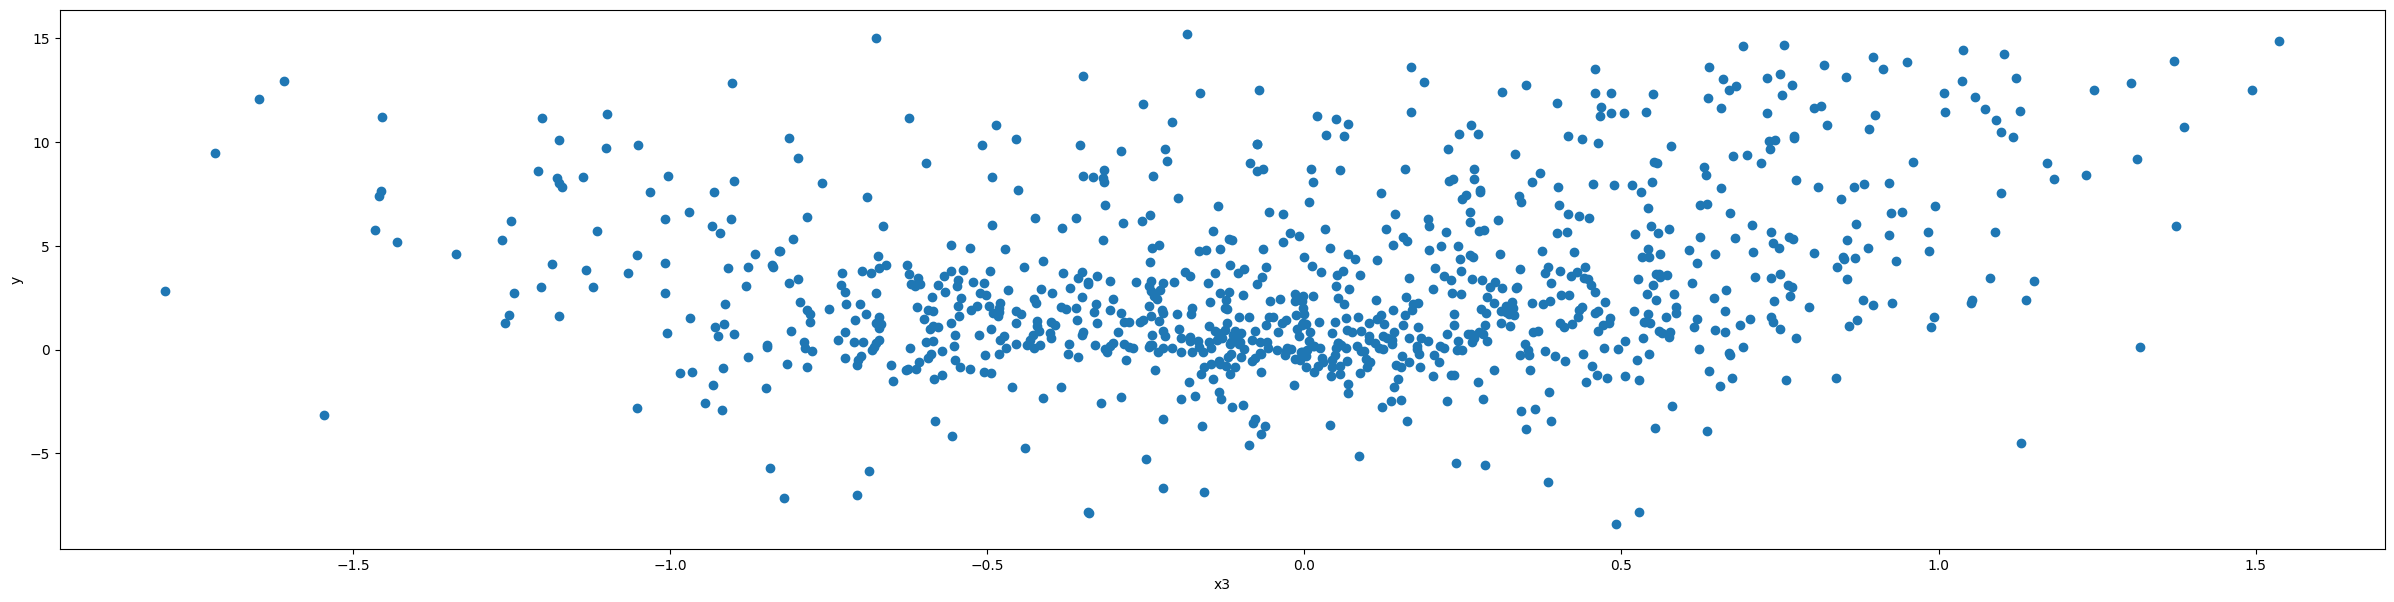

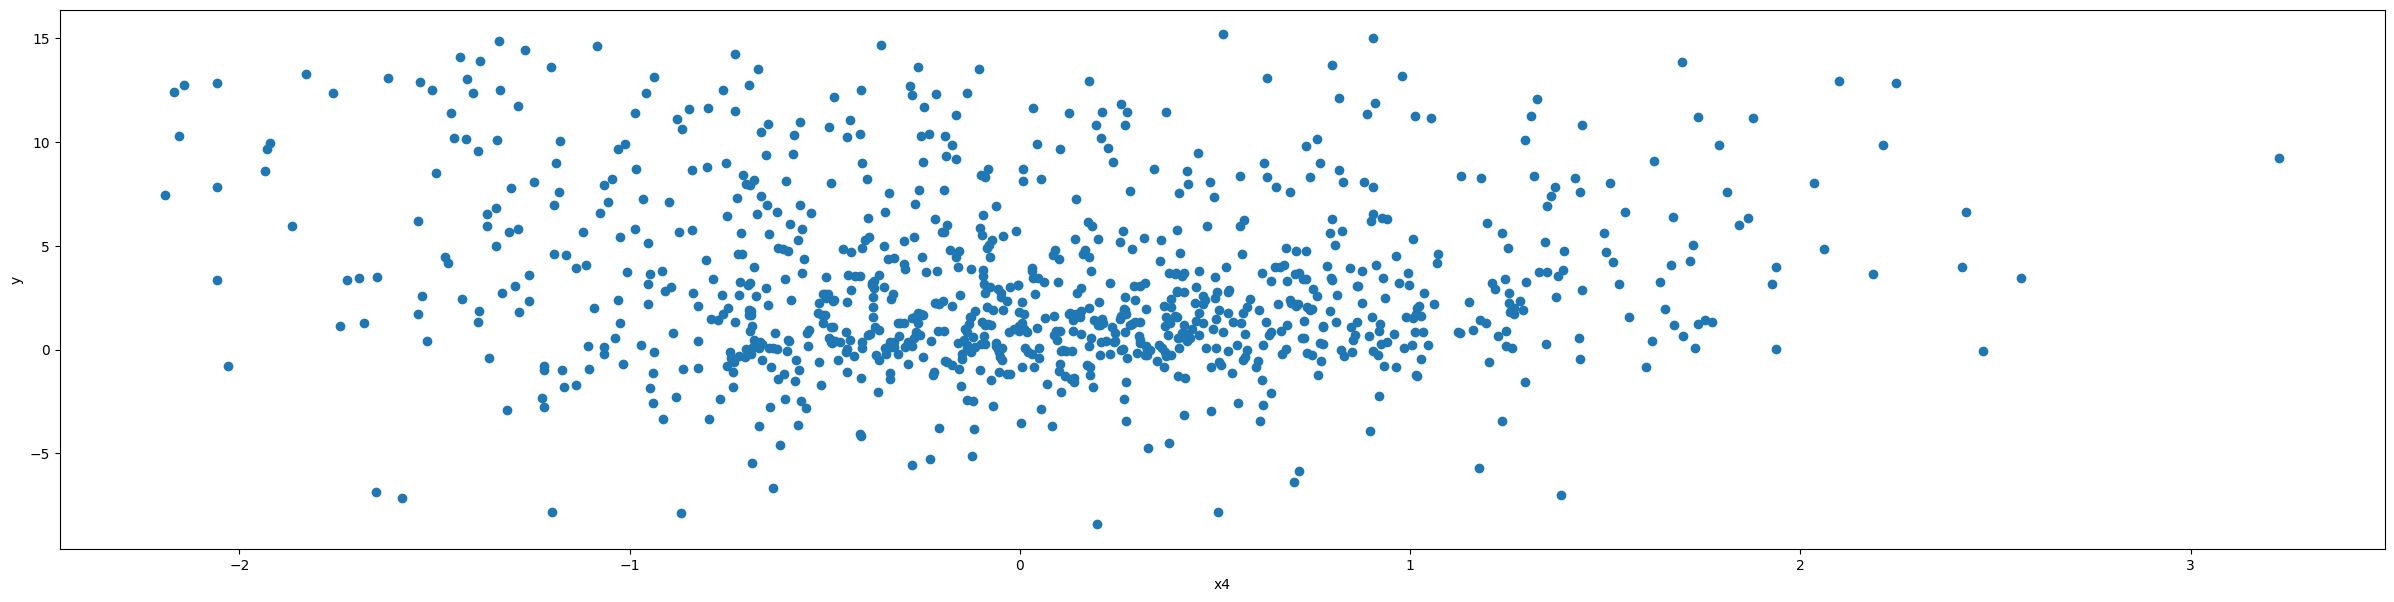

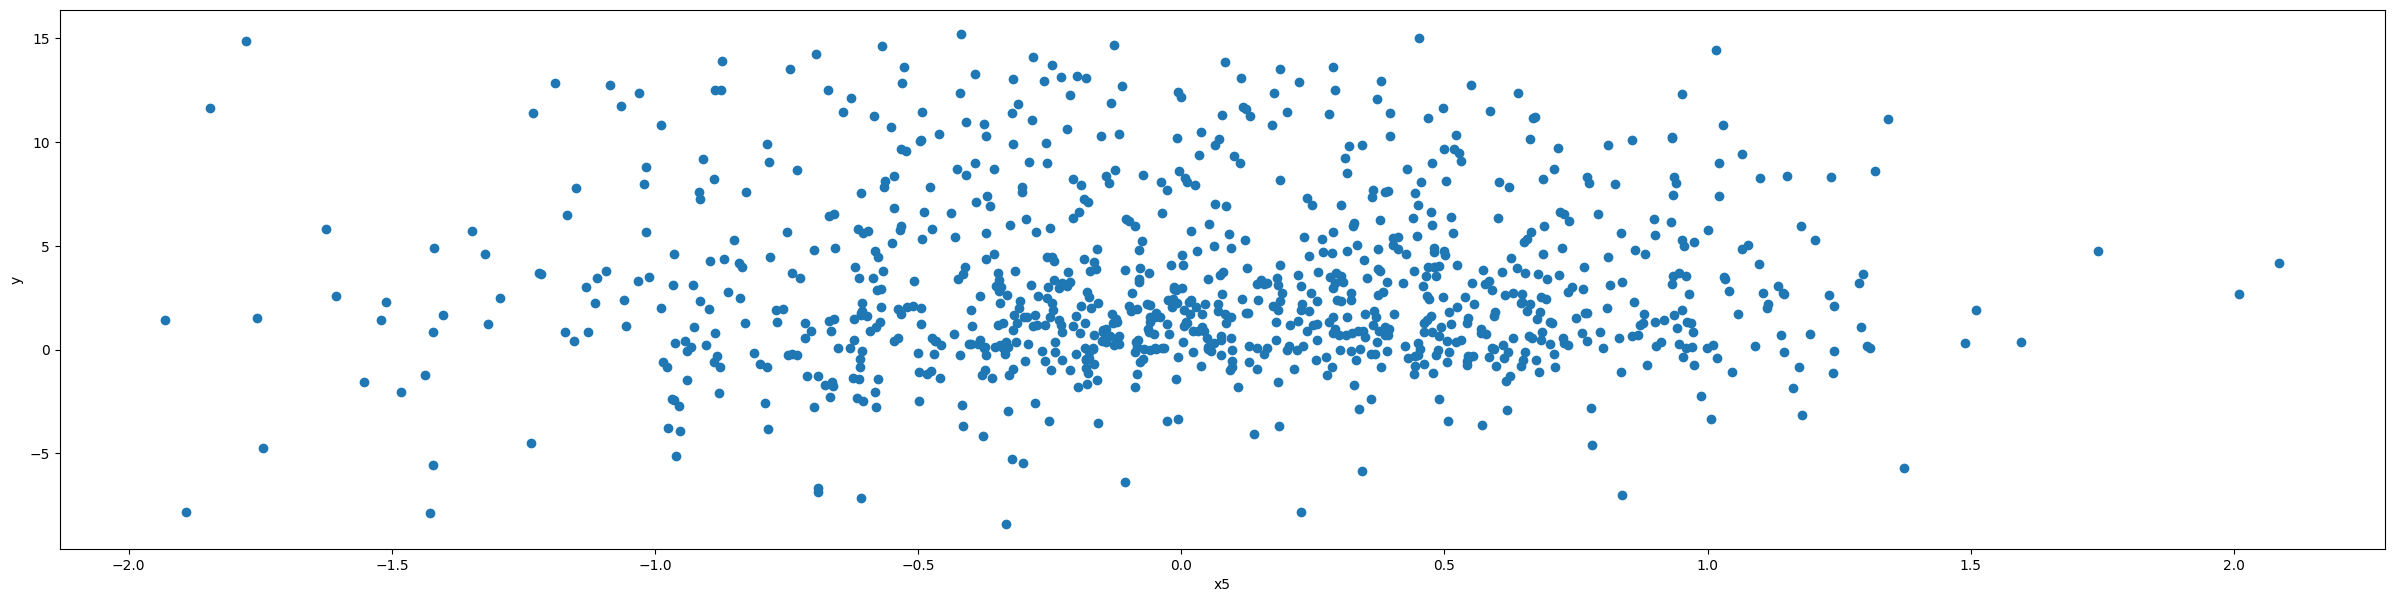

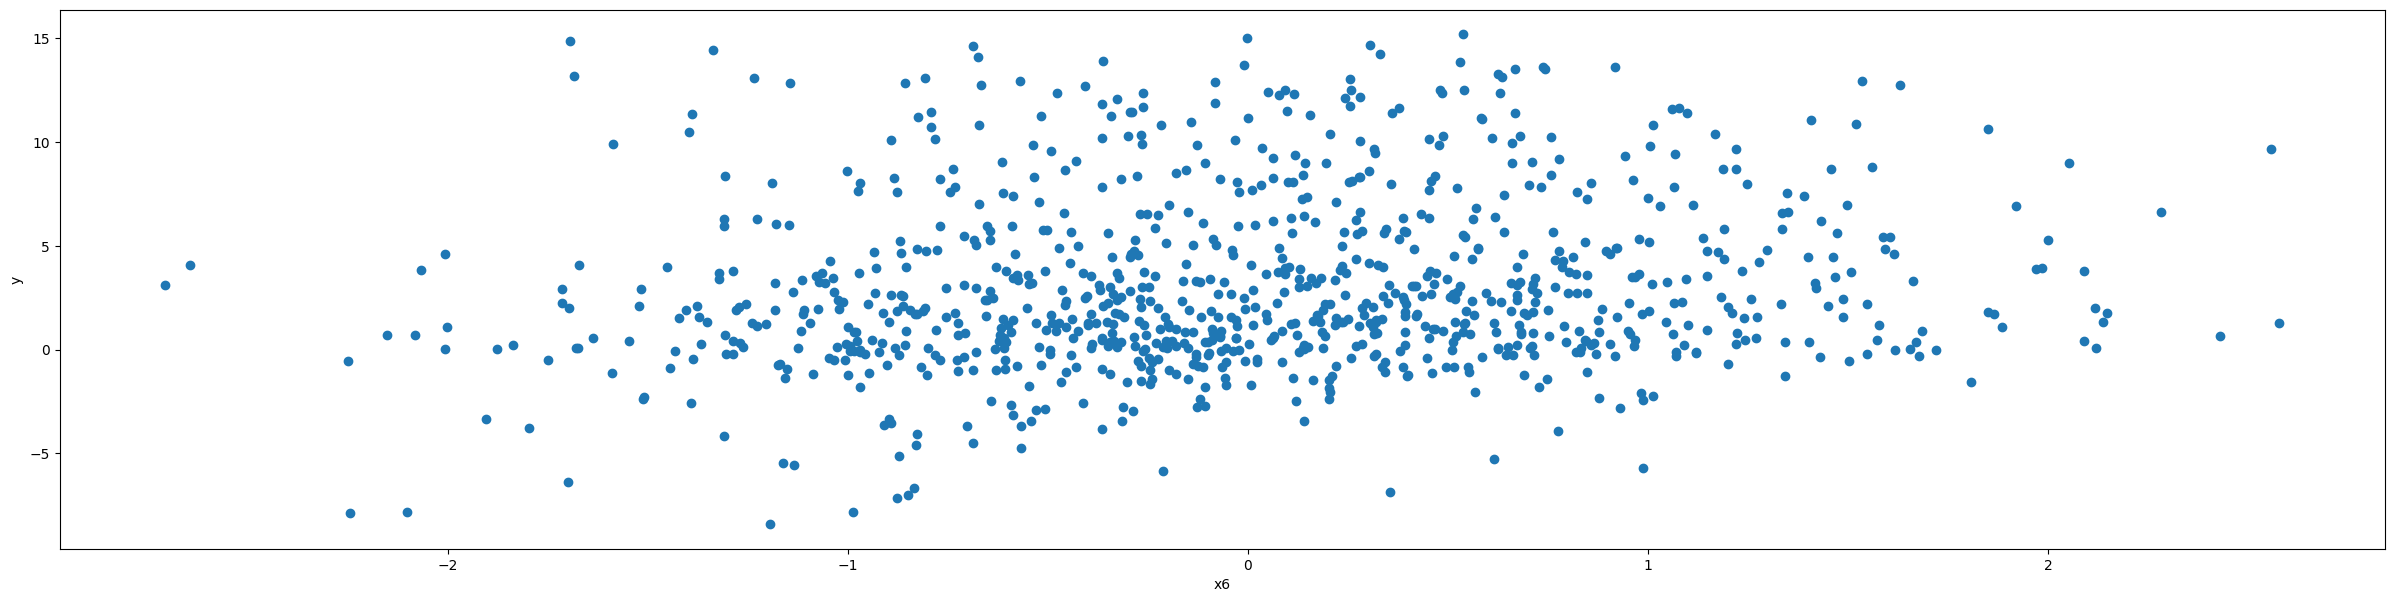

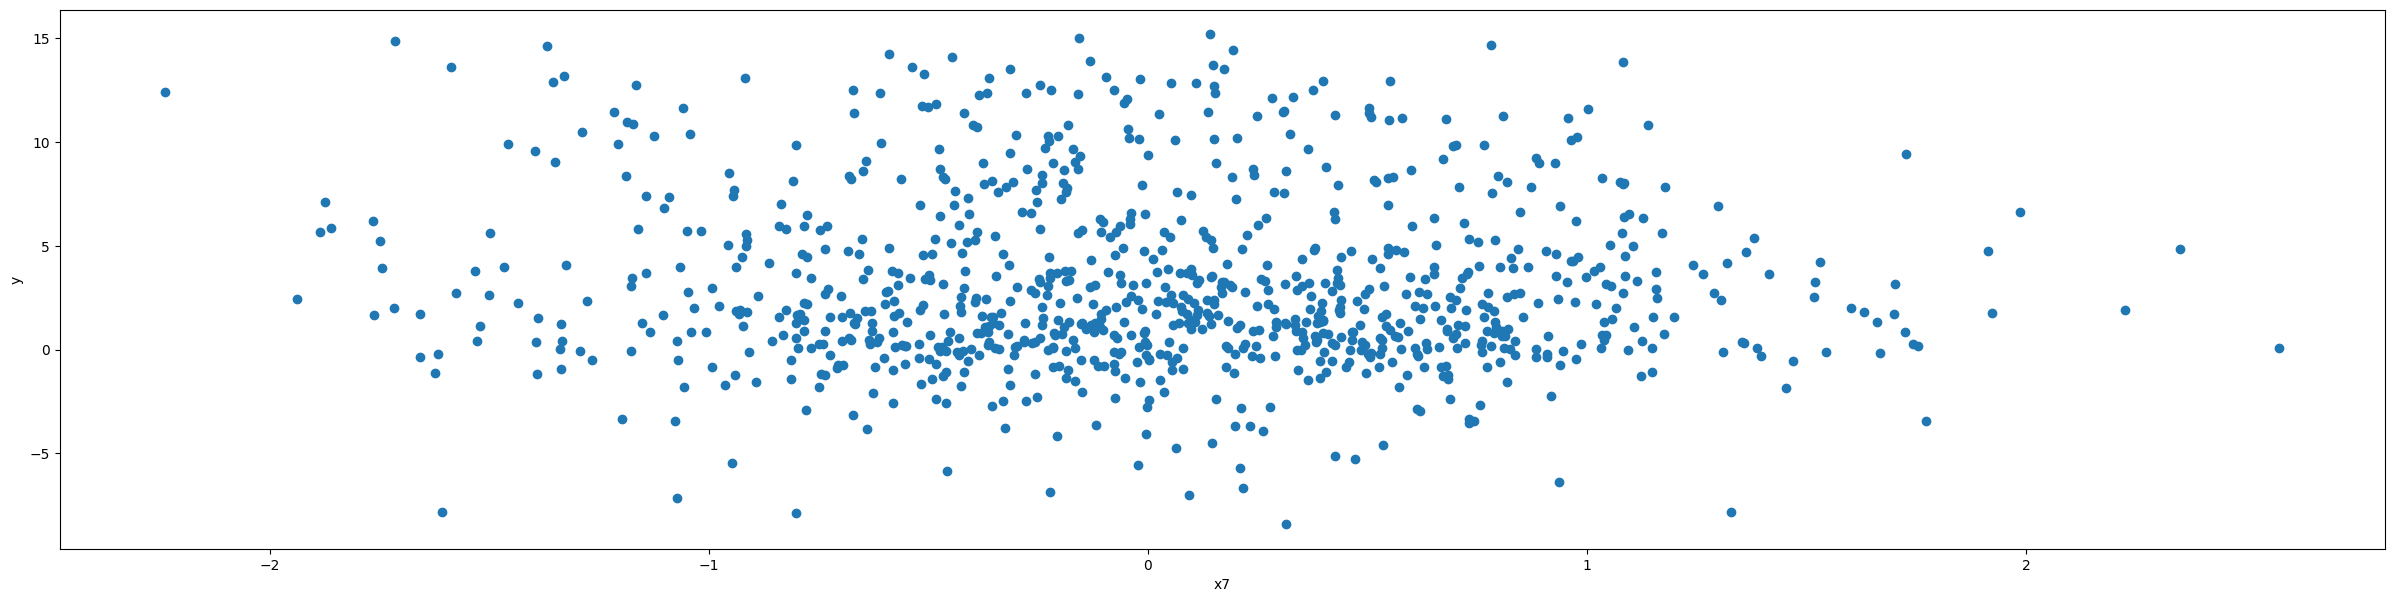

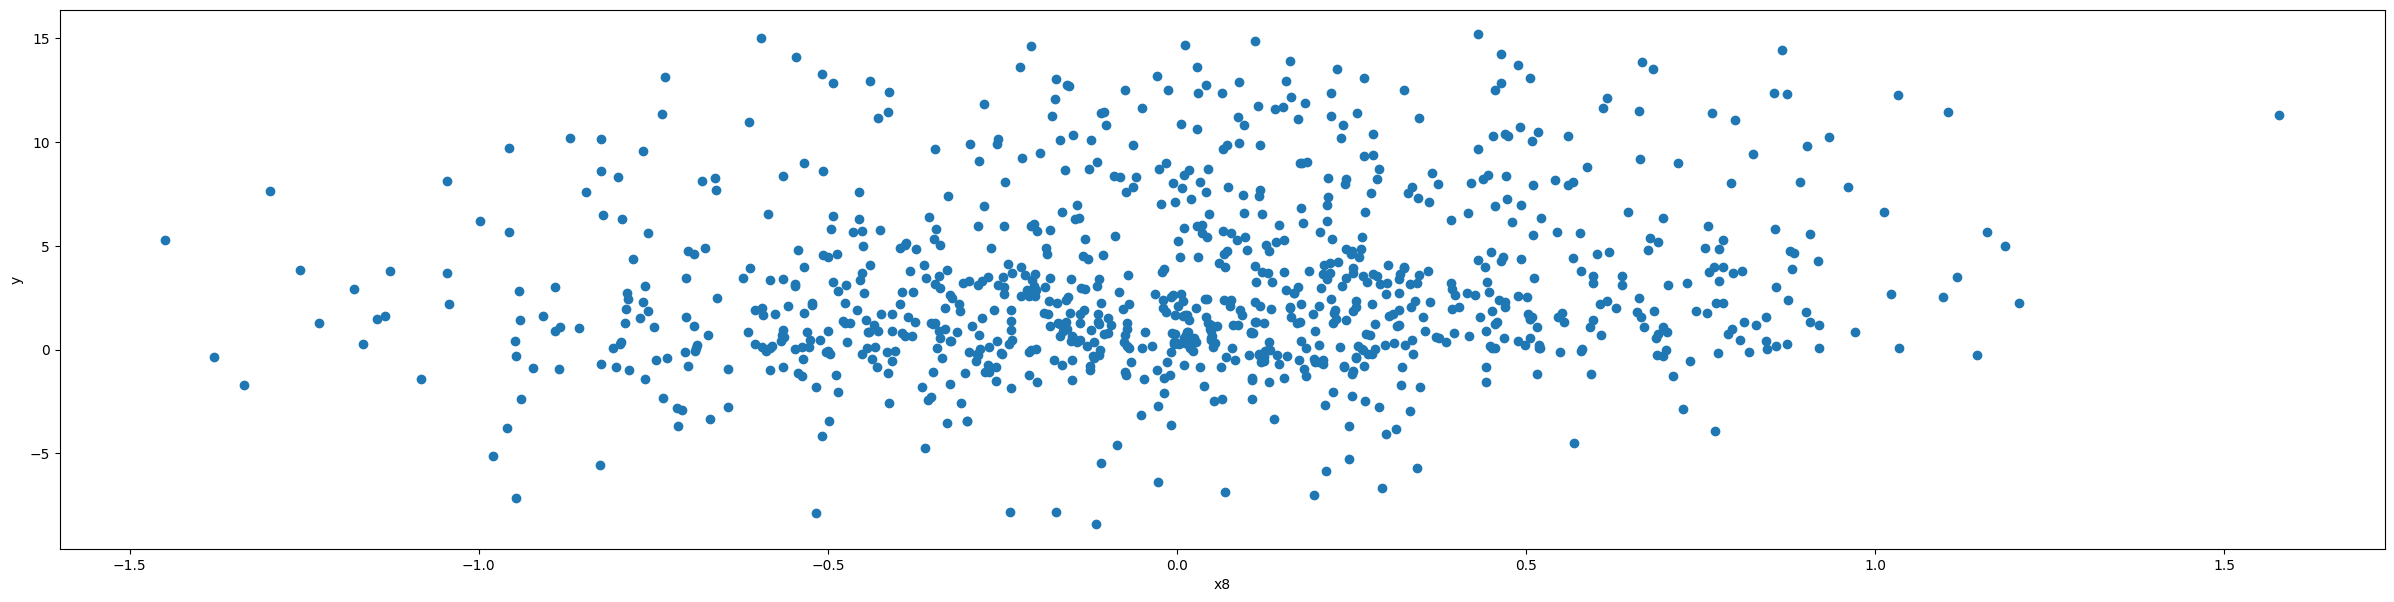

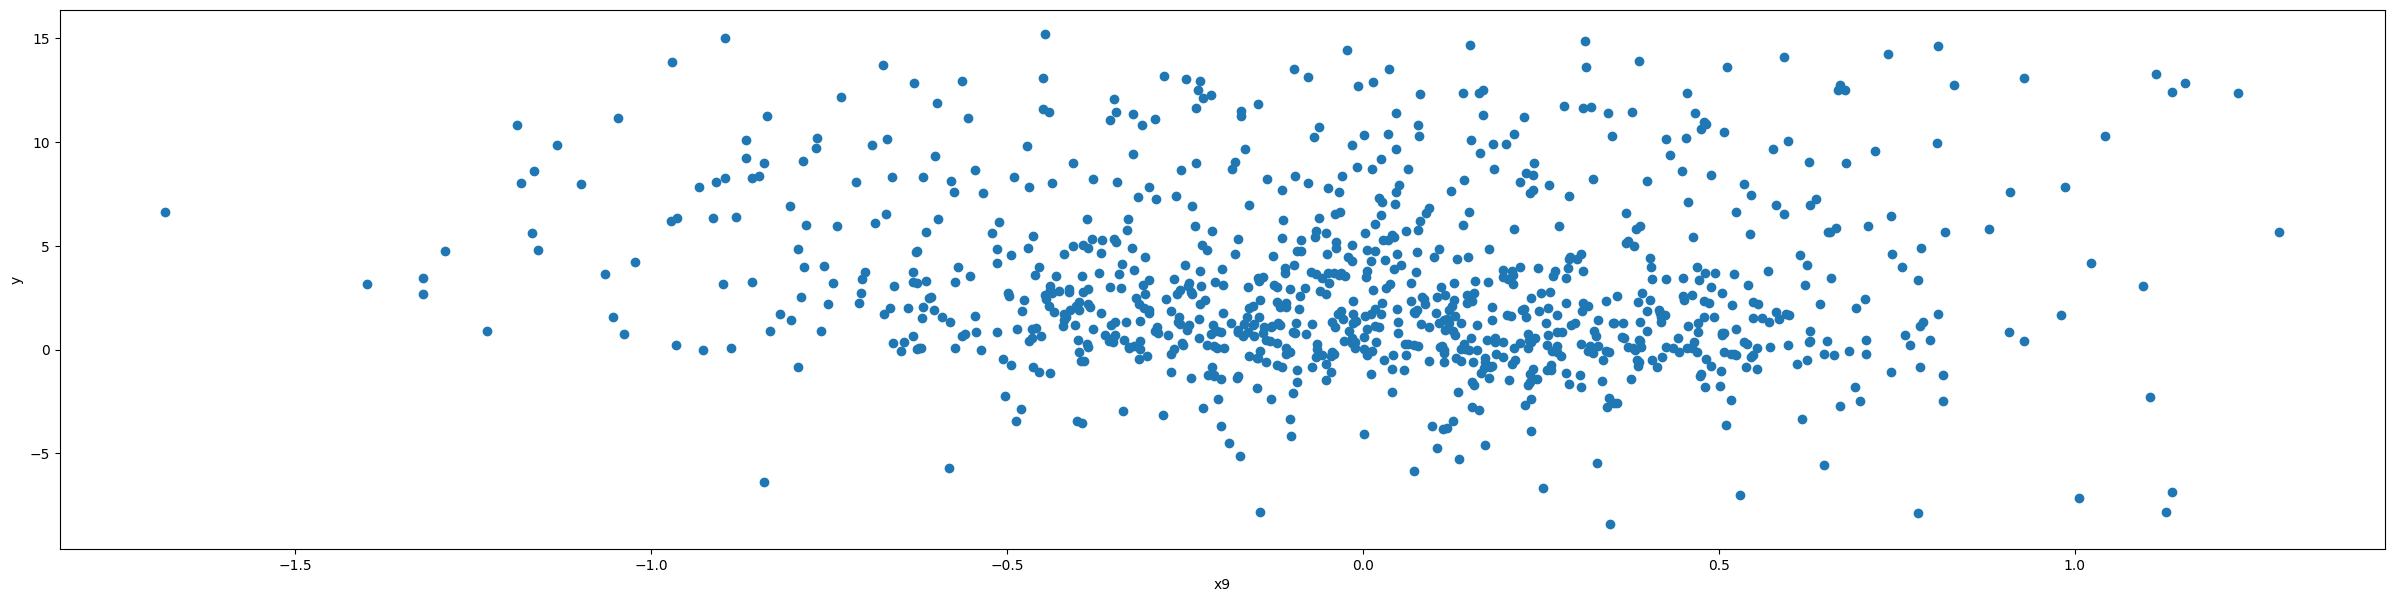

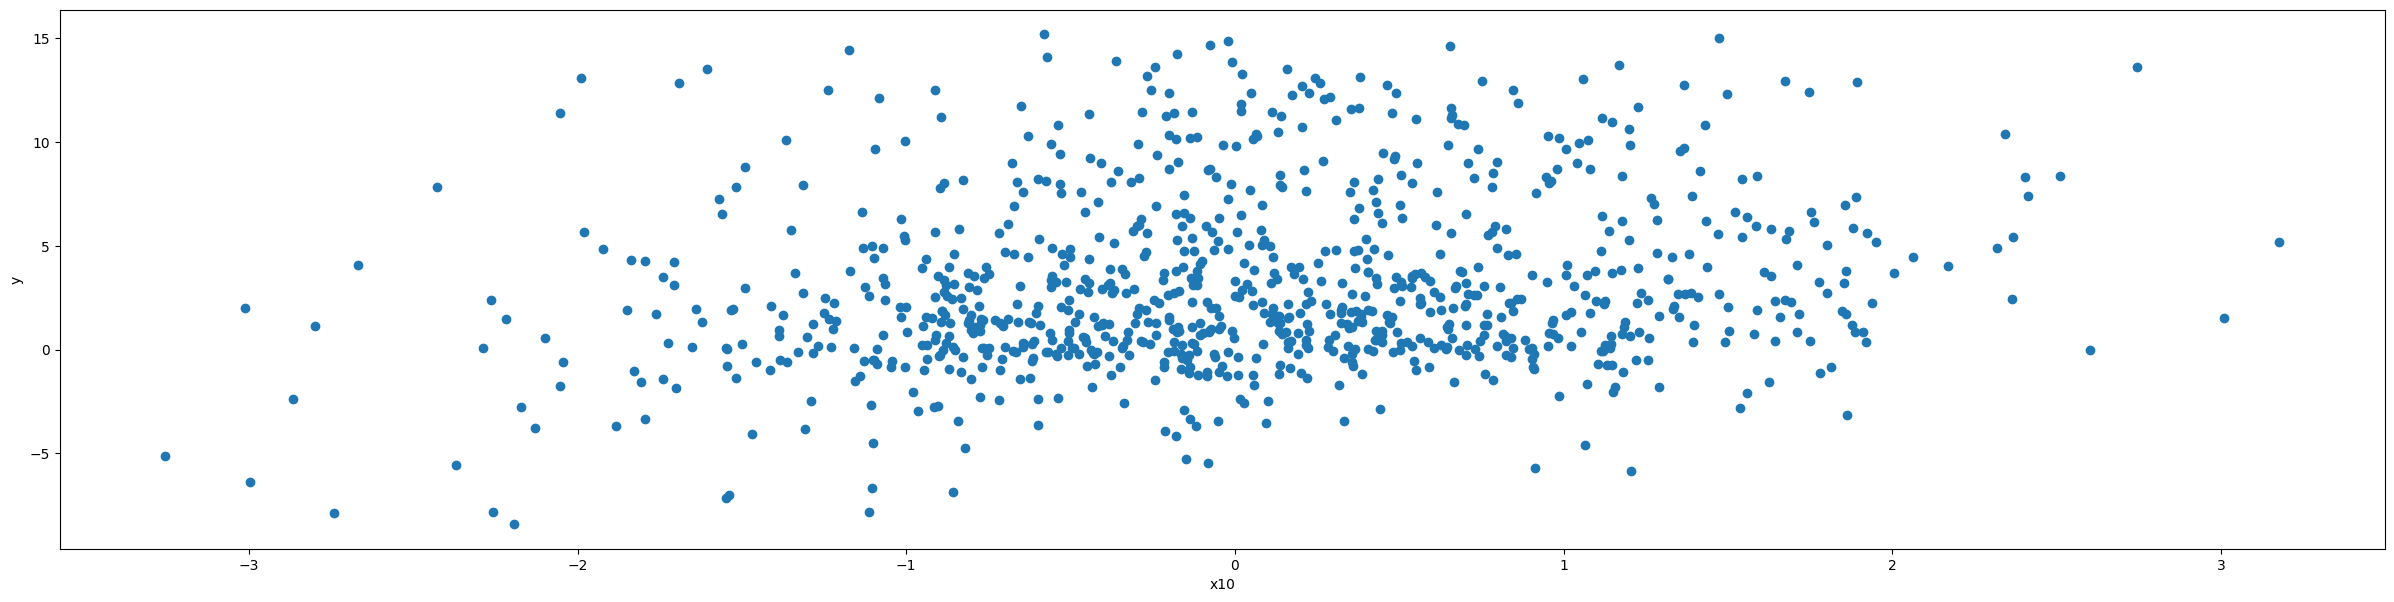

In [9]:
y=df['y']
x=df.drop('y',axis=1)
col=x.columns
for i in col:
  plt.figure(figsize = (30,7))
  plt.scatter(x[i],y)
  plt.xlabel(i)
  plt.ylabel('y')
  plt.show()

# Model Training

In [10]:
poly=PolynomialFeatures(degree=2)
x=poly.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
y_train=np.array(y_train)

In [14]:
def func(x,w,b):
  return np.dot(x,w)+b

In [15]:
m=len(x_train)
def gd(x,y,w,b,alpha):
  w_gd=np.zeros(x.shape[1])
  b_gd=0
  for i in range(m):
    y_pred=func(x[i],w,b)
    err=y_pred-y[i]
    w_gd+=err*x[i]
    b_gd+=err
  w_gd/=m
  b_gd/=m
  return w_gd,b_gd

In [16]:
def gradient_descent(x, y, w, b, iters, lr, alpha):
    for i in range(iters):
        w_grad, b_grad = gd(x, y, w, b, alpha)
        w = w - lr * w_grad
        b = b - lr * b_grad
    return w, b

In [22]:
lr=0.005
alpha=0.5
iters=1000
w=np.zeros(x_train.shape[1])
b=0
w,b=gradient_descent(x_train,y_train,w,b,iters,lr,alpha)

In [23]:
len(w)

66

**Weights and Bias**

In [24]:
w,b

(array([ 0.        , -2.45320958,  0.86880766,  0.16190069, -0.07407086,
         0.00882981,  0.10631458, -0.2284873 , -0.08776387, -0.41051684,
         0.1117251 ,  1.1267565 , -0.23547837, -0.23017126, -0.1961317 ,
        -0.0522874 ,  0.02784942,  0.22386796,  0.0454399 ,  0.21319563,
         0.01281133, -0.64722533,  1.15478923, -1.31700362, -0.38934361,
        -0.37681534,  0.29081629, -0.03223464,  0.2264593 , -0.14364166,
         0.332892  , -0.5649361 ,  0.1584036 ,  0.21954282, -0.13636573,
         0.10538643,  0.10354567,  0.04422193,  0.04122041, -0.16692832,
        -0.16528865,  0.0921541 , -0.12170785, -0.2097476 , -0.07921008,
        -0.034435  ,  0.09438767,  0.1273651 ,  0.07262257, -0.05372038,
         0.05957133,  0.06375793,  0.14871867,  0.00978722, -0.02074898,
         0.05142776, -0.11644566,  0.00290243,  0.15905557, -0.06274417,
         0.08276259, -0.05108747, -0.01288017, -0.10331846,  0.09632246,
        -0.05719739]),
 3.07927065023923)

# Testing

In [37]:
y_pred=func(x_test,w,b)
r2=r2_score(y_test,y_pred)
r2

0.9276404808746973

In [30]:
num_random_samples = 2
random_indices = np.random.choice(len(x_test), size=num_random_samples, replace=False)
random_x_samples = x_test[random_indices]
random_y_predictions = func(random_x_samples, w, b)
print("Randomly chosen x samples:\n", random_x_samples)
print("\nPredicted y values:\n", random_y_predictions)

Randomly chosen x samples:
 [[ 0.00000000e+00  4.18472195e-01  1.19217229e+00  3.72745653e-01
  -2.29935660e+00  1.02701884e+00 -7.09552060e-01 -1.03626198e+00
   4.77383193e-02  1.62879952e+00 -3.95190520e-01 -5.90407862e-01
   8.65834406e-01  5.05911751e-01 -1.07254405e+00  3.40508824e-01
  -1.62179750e-01 -6.30456857e-01  2.03896820e-01  5.59187894e-01
   7.64267390e-02  3.10297849e-01 -1.04283171e-01 -2.18174512e+00
   1.13219460e+00 -1.15838544e+00 -9.84722998e-01 -2.72877995e-01
   1.61547152e+00 -5.43647440e-01 -6.50061562e-01 -5.16424753e-01
   7.20781822e-01 -4.10303213e-01 -3.86350902e-01 -3.88568405e-01
   3.88823336e-01  5.10802477e-03  2.69289301e+00 -2.50503346e+00
   1.54566490e+00  1.64885930e+00 -2.79356042e-01 -2.34407374e+00
   6.08117638e-01  1.30252783e-01 -8.44916702e-01 -1.39165132e+00
  -4.24409262e-02  1.97659774e+00 -6.24361945e-01 -3.71966014e-01
   2.81713394e-01 -3.52175813e-01 -9.49975346e-01 -5.39031717e-03
   1.13716882e-02 -3.71042372e-01 -9.00769898e-0

# Direct Method

In [32]:
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=regr.predict(x_train)
r2=r2_score(y_pred,y_train)
r2

0.9587780588733005

In [34]:
regr.coef_

array([-1.20060904e-16, -2.88168217e+00,  1.06076484e+00, -1.84658352e-01,
        2.52370170e-02, -1.57581941e-02, -1.02836705e-01,  1.37580318e-01,
       -8.23925277e-02, -3.02890208e-02,  9.49155730e-02,  1.57588332e+00,
       -3.33231391e-03,  6.01112938e-02, -3.00270358e-01, -1.36375943e-01,
        3.33203487e-02,  9.94098169e-02, -2.59439913e-02, -1.39027948e-01,
        1.17801995e-01, -1.63841017e+00,  2.10962122e+00, -2.06099591e+00,
       -4.90581930e-02, -1.70718434e-03,  3.82713606e-02,  4.22238393e-02,
       -2.22948930e-02,  1.88650274e-02,  1.32303704e-01, -2.87252103e-01,
        5.09671706e-03,  4.41660622e-02, -1.18174780e-01, -7.35781721e-02,
       -7.83269095e-02,  4.37721096e-02, -2.44761839e-01,  2.18099434e-02,
        8.47129683e-02,  7.19892750e-02, -3.92954451e-03, -2.15757361e-01,
        6.30708366e-02, -1.36723992e-03, -1.24349800e-02,  2.08874043e-01,
       -2.54811567e-02,  3.85910388e-02,  1.36052114e-01,  4.94541244e-02,
        1.49142446e-01, -

In [35]:
regr.intercept_

3.0998972692665356